<a href="https://colab.research.google.com/github/aiswaryam2005/Fire-Detection-System/blob/main/IVA_MINI_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the ResNet50 model with ImageNet weights, exclude top layers (for customization)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification: fire or no fire

# Define the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base_model layers to prevent them from being trained
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with binary crossentropy (since it's a binary classification)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Data augmentation for training
train_datagen = ImageDataGenerator(rescale=1.0/255.0, rotation_range=30, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load your dataset (assuming you have train and validation directories with 'fire' and 'no_fire' subfolders)
train_dataset = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive (7)/data/data/img_data/train',  # Replace with the path to your training dataset
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

val_dataset = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive (7)/data/data/img_data/test',  # Replace with the path to your validation dataset
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

# Train the model
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)




Found 1052 images belonging to 3 classes.
Found 171 images belonging to 3 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 453s 12s/step - accuracy: 0.3746 - loss: -1.2589 - val_accuracy: 0.3333 - val_loss: 6.9238
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 315s 8s/step - accuracy: 0.4131 - loss: -8.2859 - val_accuracy: 0.3333 - val_loss: 22.9120
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 262s 8s/step - accuracy: 0.4163 - loss: -26.7330 - val_accuracy: 0.3333 - val_loss: 58.2266
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 243s 7s/step - accuracy: 0.3931 - loss: -67.1503 - val_accuracy: 0.3333 - val_loss: 124.8383
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 241s 7s/step - accuracy: 0.4194 - loss: -127.4064 - val_accuracy: 0.3333 - val_loss: 231.1191
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 264s 7s/step - accuracy: 0.4025 - loss: -227.1051 - val_accuracy: 0.3333 - val_loss: 384.0227
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 246s 7s/step - accuracy: 0.4165 - loss: -341.3345 - val_accuracy: 0.3333 - val_loss: 597.4335
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 267s 7s/step - accuracy: 0.4038 - loss: -540.6492 - val_ac

In [ ]:
# Save the model after training
model.save('fire_detection_vgg16.h5')  # Save the trained model for future use

In [ ]:
test_dataset = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive (7)/data/data/img_data/test',  # Replace with the actual path to your test data
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

Found 171 images belonging to 3 classes.


6/6 ━━━━━━━━━━━━━━━━━━━━ 35s 5s/step - accuracy: 0.2131 - loss: 3345.7634
Test Accuracy: 33.33%
Test loss: 161484.68%


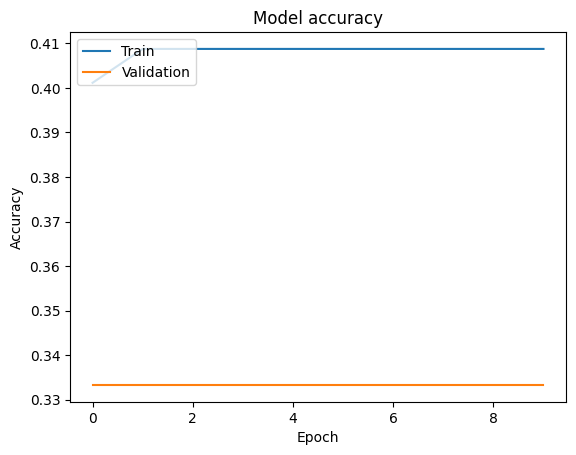

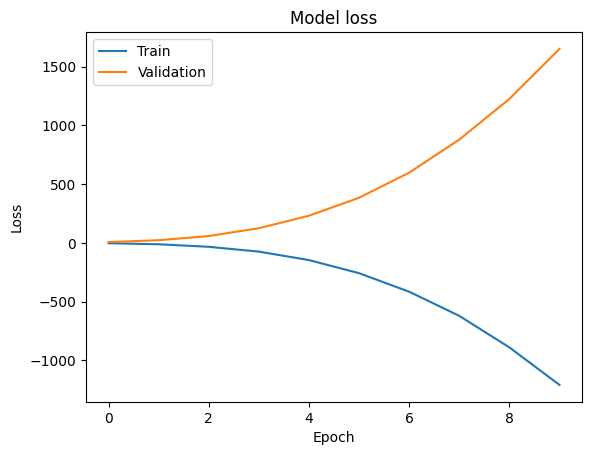

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test loss: {test_loss * 100:.2f}%")

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Fire detected! Confidence: 1.0


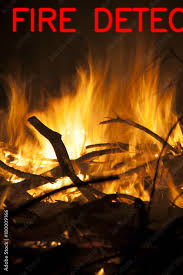

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Fire detected! Confidence: 1.0


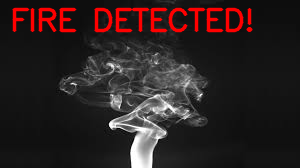

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import smtplib
from google.colab.patches import cv2_imshow

# Load the pre-trained fire detection model (You need to train a model beforehand)
model = tf.keras.models.load_model('fire_detection_vgg16.h5')

# Compile the model to avoid the warning and ensure proper evaluation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


def process_image(image_path):
    # Load the image
    frame = cv2.imread(image_path)

    # Preprocess the image for model input
    processed_frame = cv2.resize(frame, (224, 224))  # Resize to model's input size
    processed_frame = processed_frame / 255.0  # Normalize the pixel values
    processed_frame = np.expand_dims(processed_frame, axis=0)  # Add batch dimension

    # Predict using the model
    prediction = model.predict(processed_frame)

    # If fire is detected with confidence above 80%, trigger an alert
    if prediction[0][0] > 0.8:
        print("Fire detected! Confidence:", prediction[0][0])
        cv2.putText(frame, "FIRE DETECTED!", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    else:
        cv2.putText(frame, "No Fire", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Display the image with detection results
    cv2_imshow(frame)

# Example of predicting fire in an image
image_path = '/content/drive/MyDrive/fire image.jpeg'  # Replace with the actual image path
process_image(image_path)
image_path = '/content/drive/MyDrive/smoke image.jpeg'  # Replace with the actual image path
process_image(image_path)